In [1]:
import csv
# 读取filename里面的数据
def readFromFile(filename):
    dataLines = []
    with open(filename, newline='',encoding='utf-8') as f:#这里改了encoding方式，不然我打不开
#         remove the first line
#         去除第一行
        f.readline()
        rows = csv.reader(f)
        dataLines = list(rows)
#         correct the label into standard form
#         将字符型label转换为整数型label，并且补全将‘’补成0
        for dataLine in dataLines:
            if dataLine[1] == '0.0' or dataLine[1] == '':
                dataLine[1] = 0
            elif dataLine[1] == '1.0':
                dataLine[1] = 1
        
            if dataLine[0] == '0.0' or dataLine[0] == '':
                dataLine[0] = 0
            elif dataLine[0] == '1.0':
                dataLine[0] = 1
                dataLine[1] = 1
    return dataLines
filenames = ['data/part1.csv', 'data/part2.csv', 'data/part4.csv','data/template1.csv','data/template2.csv']
dataLines = []
for filename in filenames:
    dataLines_ = readFromFile(filename)
    dataLines += dataLines_

In [2]:
# read data
# 数据读取
import csv

# 读取filename里面的数据
def readFromFile(filename):
    dataLines = []
    with open(filename, newline='',encoding='utf-8') as f:
#         remove the first line
#         去除第一行
        f.readline()
        rows = csv.reader(f)
        dataLines = list(rows)
#         correct the label into standard form
#         将字符型label转换为整数型label，并且补全将‘’补成0
        for dataLine in dataLines:
            if dataLine[0] == '0.0' or dataLine[0] == '':
                dataLine[0] = 0
            elif dataLine[0] == '1.0':
                dataLine[0] = 1
            
            if dataLine[1] == '0.0' or dataLine[1] == '':
                dataLine[1] = 0
            elif dataLine[1] == '1.0':
                dataLine[1] = 1
    return dataLines

filenames = ['data/part1.csv', 'data/part2.csv', 'data/part4.csv','data/template1.csv','data/template2.csv']
dataLines = []
for filename in filenames:
    dataLines_ = readFromFile(filename)
    dataLines += dataLines_

In [3]:
len(dataLines)

688

In [4]:
dataLines_[1]

[1,
 1,
 '很棒棒哦哦哦哦哦哦哦哦哦哦哦哦哦哦哦哦哦哦哦哦哦哦哦哦哦哦哦哦哦真的还可以啊姐姐我自己的评论的远离家乡为生活奔波的我，在这个特别的日子里，要感恩生我爱我的家人，感恩无论多么遥远始终挂念着我的朋友。感谢你们让我成为一个内心温暖的人！']

In [5]:
# 查看最后一行数据
print(dataLines[683])

[1, 1, '丑 普希金的《致大海》 再见吧，自由的原素！ 最后一次了，在我眼前 你的蓝色的浪头翻滚起伏， 你的骄傲的美闪烁壮观。 仿佛友人的忧郁的絮语， 仿佛他别离一刻的招呼， 最后一次了，我听着你的 喧声呼唤，你的沉郁的吐诉。 我全心渴望的国度啊，大海！ 多么常常地，在你的岸上 我静静地，迷惘地徘徊， 苦思着我那珍爱的愿望。 啊，我多么爱听你的回声， 那喑哑的声音，那深渊之歌， 我爱听你黄昏时分的幽静， 和你任性的脾气的发作！ 渔人的渺小的帆凭着 你的喜怒无常的保护 在两齿之间大胆地滑过， 但你若汹涌起来，无法克服， 成群的渔船就会覆没。 直到现在，我还不能离开 这令我厌烦的凝固的石岸， 我还没有热烈地拥抱你，大海！ 也没有让我的诗情的波澜 随着你的山脊跑开！ 你在期待，呼唤&hellip;&hellip;我却被缚住， 我的心徒然想要挣脱开， 是更强烈的感情把我迷住， 于是我在岸边留下来&hellip;&hellip; 有什么可顾惜的？而今哪里 能使我奔上坦荡的途径？ 在你的荒凉中，只有一件东西 也许还激动我的心灵。 一面峭壁，一座光荣的坟墓&hellip;&hellip; 那里，种种伟大的回忆 已在寒冷的梦里沉没， 啊，是拿破仑熄灭在那里。 他已经在苦恼里长眠。 紧随着他，另']


# comment data preprocessing

In [6]:
# comment data preprocessing
# 评论数据的预处理
## 0. shuffle data
## 0. 打乱数据顺序（需要注意由于数据打乱了，每次执行的结果都会不同）
from random import shuffle
shuffle(dataLines)

In [7]:
## 1. remove default comment
## 1. 去除默认评论
dataLines1 = [line for line in dataLines if line[2] != '此用户没有填写评论!']
print(len(dataLines1))      # 查看剩余数据量

660


In [8]:
## 2. remove noise
## 2. 移除噪声符号（可以修改，见文件word2vec/utils.py）
## [参考](https://blog.csdn.net/mach_learn/article/details/41744487)
import re
from word2vec.utils import remove_noise

dataLines2 = [[line[0], line[1], remove_noise(line[2])] for line in dataLines1]
#在除去了默认评论后的数据集1的基础上移除噪声，对line中的第三部分（就是评论部分）移除噪声
print(dataLines2[0])        # 随机查看一条数据

[0, 0, '前面买了一件上身刚刚好老公很喜欢第二次回购一口气买四件质量好手感好']


In [9]:
## 3. text segmentation
## 3. 使用jieba分词
import jieba

def segmentation(text):
    return jieba.cut(text)

dataLines3 = [[line[0], line[1], segmentation(line[2])] for line in dataLines2]

In [10]:
## 4. remove stop words
## 4. 移除停用词

# 加载停用词
def loadStopWords(filename):
    stopwords = [line.strip() for line in \
                 open(filename, 'r', encoding='utf-8').readlines()]
    return stopwords

stopWordFilename = 'data/stop_words.txt'
stopWords = loadStopWords(stopWordFilename)
dataLines4 = [[line[0], line[1], [word for word in line[2] if word not in stopWords]]
             for line in dataLines3]
#把数据集3里的词过滤停用词，这里如果3中的line有停用词，这一行是不是就没有东西？

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.641 seconds.
Prefix dict has been built succesfully.


In [11]:
## 5. word Embedding, the word2Vec training see folder word2vec
## 5. 词向量嵌入，这里加载训练好的word2vec模型，训练过程见文件夹word2vec
## Currently the corpus is not cleaned yet.
## 现在训练word2vec模型的语料预处理同前面一样，调用remove_noise()和结巴分词
import gensim

# 加载训练好的模型
model = gensim.models.Word2Vec.load('word2vec/w2v.model')

# 将文本转换为词向量
dataLines5 = []
for line in dataLines4:
    temp = []
    temp = [model.wv[word] for word in line[2] if word in list(model.wv.vocab)]
    #把数据集4中的一行line提取出来，对评论(line[2])中的每一个word进行判断，如果这个词在vocab里面就进行转换
    if len(temp) == 0:
        temp = [0 for i in range(100)]
    else:
        temp = sum(temp)
    dataLines5.append([line[0], line[1], temp])
dataLines5[2]

[0,
 0,
 array([-8.20455456e+00,  8.88252640e+00,  2.00976515e+00, -2.91644716e+00,
         2.09772635e+00, -1.11000500e+01, -1.48308935e+01, -1.35158463e+01,
        -4.73030716e-01, -2.51412892e+00,  8.84997749e+00, -9.92908120e-01,
        -4.51319647e+00,  1.55463898e+00, -5.84110641e+00,  1.46065073e+01,
         5.87366819e+00,  6.87709332e+00,  1.44698582e+01,  1.42021503e+01,
        -1.07972422e+01, -3.14111805e+00,  6.47470617e+00,  5.28907728e+00,
         1.68949872e-01,  5.29124737e+00, -1.18839970e+01, -1.71041489e+00,
         2.51614046e+00,  9.48637772e+00, -1.17515430e+01, -3.21484208e+00,
        -9.17351055e+00, -1.61176224e+01,  2.16189528e+00, -2.98551250e+00,
        -3.86554050e+00,  6.29609823e-03,  2.55772281e+00,  1.43725863e+01,
        -1.50025454e+01, -2.67801881e-02,  4.12680292e+00,  6.34397984e+00,
         2.72660995e+00,  5.24617290e+00, -2.95949435e+00,  1.42152605e+01,
        -5.98806667e+00, -7.32537317e+00,  7.19866133e+00,  5.21284401e-01,
    

In [12]:
# logistic regression
# logistic回归

from sklearn.linear_model import LogisticRegression
import numpy as np

# 将dataLines5的数据，label分开
X_all = [line[2] for line in dataLines5]
Y1_all = [line[0] for line in dataLines5]
Y2_all = [line[1] for line in dataLines5]

# 划分数据，前500条为训练集，后72条为测试集
X_train = X_all[0:500]
Y1_train = Y1_all[0:500]
Y2_train = Y2_all[0:500]

X_test = X_all[500:]
Y1_test = Y1_all[500:]
Y2_test = Y2_all[500:]

# 看看各个集合的数目

In [13]:
print(len(Y1_test))

160


In [14]:
Y1_test.count(1)/len(Y1_test)

0.18125

In [15]:
#print(Y1_test.count(1),Y2_test.count(1),Y2_test.count(1))
print("模板评论测试集合长度为{0},有{1}个模板, 比例为{2}%".format(len(Y1_test),(Y1_test.count(1)), (Y1_test.count(1)*100 /(len(Y1_test)) )))
print("水评测试集合长度为{0},有{1}个水评, 比例为{2}%".format(len(Y2_test),(Y2_test.count(1)), (Y2_test.count(1)*100 /(len(Y2_test)) )))
#print("TestSet1' length is {0}, with {1} templet".format(len(Y1_test),Y1_test.count(1)))

模板评论测试集合长度为160,有29个模板, 比例为18.125%
水评测试集合长度为160,有43个水评, 比例为26.875%


# 0.对数据集转换为numpy形式

In [16]:
import numpy as np
#把label转化为numpy矩阵才能输入SVM
X_all=np.array(X_all)
X_test=np.array(X_test)
X_train=np.array(X_train)

Y1_all=np.array(Y1_all)
Y1_test=np.array(Y1_test)
Y1_train=np.array(Y1_train)

Y2_all=np.array(Y2_all)
Y2_test=np.array(Y2_test)
Y2_train=np.array(Y2_train)

In [17]:
##画图
from matplotlib import  pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False

In [18]:
##计时
import time

# 1.使用knn进行分类

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

/home/harry/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/harry/anaconda3/lib/python3.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [20]:
knn1=KNeighborsClassifier(n_neighbors=5)
knn2=KNeighborsClassifier(n_neighbors=5)
knn1_scores=cross_val_score(knn1,X_all,Y1_all,cv=5,scoring='accuracy')
knn2_scores=cross_val_score(knn2,X_all,Y2_all,cv=5,scoring='accuracy')

In [21]:
print(knn1_scores,knn2_scores)

[0.93233083 0.93233083 0.93939394 0.91603053 0.94656489] [0.80451128 0.81060606 0.8030303  0.79545455 0.77862595]


In [22]:
##调参范围
k_list=[i+1  for i in range(40)]
knn_param_templet = dict(n_neighbors=k_list, weights=['uniform','distance'])
knn_param_invalid = dict(n_neighbors=k_list, weights=['uniform','distance'])

In [23]:
knn1=KNeighborsClassifier(n_neighbors=5)
knn2=KNeighborsClassifier(n_neighbors=5)
##初始化训练网格
knn1_grid=GridSearchCV(knn1,knn_param_templet,cv=5,scoring='accuracy',n_jobs=-1)
knn2_grid=GridSearchCV(knn2,knn_param_invalid ,cv=5,scoring='accuracy',n_jobs=-1)
##开始训练, 因为这里使用了自带的五叠交叉验证, 所以使用全部数据集来fit
knn1_grid.fit(X_all,Y1_all)
knn2_grid.fit(X_all,Y2_all)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [24]:
print('The best params for knn1 is ',knn1_grid.best_params_ , 'with its scores',knn1_grid.best_score_)
print('The best params for knn2 is ',knn2_grid.best_params_ , 'with its scores',knn2_grid.best_score_)

The best params for knn1 is  {'n_neighbors': 6, 'weights': 'distance'} with its scores 0.9363636363636364
The best params for knn2 is  {'n_neighbors': 15, 'weights': 'uniform'} with its scores 0.8121212121212121


In [25]:
len(knn1_grid.grid_scores_)

80

In [26]:
knn1_uniform_accuracy_list=[]
knn2_uniform_accuracy_list=[]
knn1_distance_accuracy_list=[]
knn2_distance_accuracy_list=[]
for i in range(int(len(knn1_grid.grid_scores_)/2)):
    knn1_uniform_accuracy_list.append(knn1_grid.grid_scores_[2*i][1]*100)
for i in range(int(len(knn1_grid.grid_scores_)/2)):
    knn2_uniform_accuracy_list.append(knn2_grid.grid_scores_[2*i][1]*100)
for i in range(int(len(knn1_grid.grid_scores_)/2)):
    knn1_distance_accuracy_list.append(knn1_grid.grid_scores_[2*i+1][1]*100)
for i in range(int(len(knn1_grid.grid_scores_)/2)):
    knn2_distance_accuracy_list.append(knn2_grid.grid_scores_[2*i+1][1]*100)

/home/harry/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


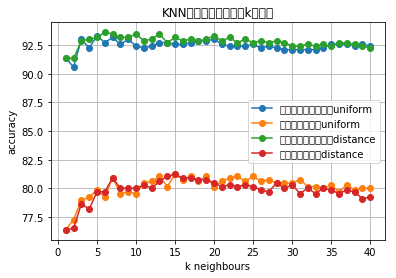

In [27]:
plt.plot(k_list,knn1_uniform_accuracy_list,'o-',label='模板评论分类准确率uniform')
plt.plot(k_list,knn2_uniform_accuracy_list,'o-',label='水评分类准确率uniform')
plt.plot(k_list,knn1_distance_accuracy_list,'o-',label='模板评论分类准确率distance')
plt.plot(k_list,knn2_distance_accuracy_list,'o-',label='水评分类准确率distance')
plt.xlabel('k neighbours')
plt.ylabel('accuracy')
plt.title('KNN分类准确率与参数k的关系')
plt.savefig('figure/KNN分类准确率与参数k的关系', dpi=300)
plt.grid()
plt.legend()
plt.show()

In [28]:
#备用来尝试
#knn1_grid.predict()

# 2.使用SVM分类器进行分类

In [29]:
from sklearn.svm import SVC
svm1=SVC()#模板评论分类器
svm2=SVC()#水评分类器
svm1_scores=cross_val_score(svm1,X_all,Y1_all,cv=5,scoring='accuracy')
svm2_scores=cross_val_score(svm2,X_all,Y2_all,cv=5,scoring='accuracy')

In [30]:
svm1_param_templet = [{'kernel': ['rbf'] ,  'gamma' : [1e-3, 1e-4]  ,  'C': [1,10,100]},
                                           { 'kernel': ['linear'] ,   'C': [1,10,100]}]
svm2_parameters_invalid = [{'kernel': ['rbf'] ,  'gamma' : [1e-3,1e-4]  ,  'C': [1,10,100]},
                                           { 'kernel': ['linear'] , 'C': [1,10,100]}]

In [31]:
##初始化训练网格
svm1_grid=GridSearchCV(svm1,svm1_param_templet,cv=2,scoring='accuracy',n_jobs=-1)
svm2_grid=GridSearchCV(svm2,svm2_parameters_invalid ,cv=2,scoring='accuracy',n_jobs=-1)
##开始训练, 因为这里使用了自带的五叠交叉验证, 所以使用全部数据集来fit
svm1_grid.fit(X_all,Y1_all)
svm2_grid.fit(X_all,Y2_all)

GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100]}, {'kernel': ['linear'], 'C': [1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [32]:
svm1_grid.grid_scores_

[mean: 0.92576, std: 0.00758, params: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.93485, std: 0.00152, params: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.91667, std: 0.01061, params: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.93636, std: 0.00606, params: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.91364, std: 0.01364, params: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.92576, std: 0.00152, params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.90758, std: 0.01970, params: {'C': 1, 'kernel': 'linear'},
 mean: 0.91061, std: 0.01364, params: {'C': 10, 'kernel': 'linear'},
 mean: 0.92121, std: 0.01515, params: {'C': 100, 'kernel': 'linear'}]

In [33]:
svm1_grid.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [34]:
svm2_grid.grid_scores_

[mean: 0.79242, std: 0.00392, params: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.80606, std: 0.01271, params: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.82273, std: 0.01417, params: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.80606, std: 0.00362, params: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.80000, std: 0.00061, params: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'},
 mean: 0.79848, std: 0.00213, params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.80152, std: 0.01727, params: {'C': 1, 'kernel': 'linear'},
 mean: 0.78636, std: 0.02034, params: {'C': 10, 'kernel': 'linear'},
 mean: 0.79242, std: 0.01730, params: {'C': 100, 'kernel': 'linear'}]

In [35]:
svm2_grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [36]:
##网格调参第二次
svm1_param_templet = [{'kernel': ['rbf'] ,  'gamma' : [0.0001]  ,  'C': [1,5,10]}]
svm2_parameters_invalid = [{'kernel': ['rbf'] ,  'gamma' : [0.0001]  ,  'C': [50,100,150]}]
##初始化训练网格
svm1_grid=GridSearchCV(svm1,svm1_param_templet,cv=4,scoring='accuracy',n_jobs=-1)
svm2_grid=GridSearchCV(svm2,svm2_parameters_invalid ,cv=4,scoring='accuracy',n_jobs=-1)
##开始训练, 因为这里使用了自带的五叠交叉验证, 所以使用全部数据集来fit
svm1_grid.fit(X_all,Y1_all)
svm2_grid.fit(X_all,Y2_all)

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.0001], 'C': [50, 100, 150]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [37]:
svm2_grid.grid_scores_

[mean: 0.79848, std: 0.02195, params: {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.80303, std: 0.02240, params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'},
 mean: 0.80606, std: 0.02546, params: {'C': 150, 'gamma': 0.0001, 'kernel': 'rbf'}]

In [38]:
len(svm2_grid.grid_scores_)

3

In [39]:
svm1_c_list=[i for i in range(1,12,2)]
svm2_c_list=[i for i in range(50,150,15)]
##网格调参第三次
svm1_param_templet = [{'kernel': ['rbf'] ,  'gamma' : [0.0001]  ,  'C':svm1_c_list}]
svm2_parameters_invalid = [{'kernel': ['rbf'] ,  'gamma' : [0.0001]  ,  'C': svm2_c_list}]
##初始化训练网格
svm1_grid=GridSearchCV(svm1,svm1_param_templet,cv=3,scoring='accuracy',n_jobs=-1)
svm2_grid=GridSearchCV(svm2,svm2_parameters_invalid ,cv=3,scoring='accuracy',n_jobs=-1)
##开始训练, 因为这里使用了自带的五叠交叉验证, 所以使用全部数据集来fit
svm1_grid.fit(X_all,Y1_all)
svm2_grid.fit(X_all,Y2_all)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.0001], 'C': [50, 65, 80, 95, 110, 125, 140]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [40]:
svm1_accuracy_list=[]
svm2_accuracy_list=[]
for i in range(int(len(svm1_grid.grid_scores_))):
    svm1_accuracy_list.append(svm1_grid.grid_scores_[i][1]*100)
for i in range(int(len(svm2_grid.grid_scores_))):
    svm2_accuracy_list.append(svm2_grid.grid_scores_[i][1]*100)


In [41]:
svm2_accuracy_list

[80.45454545454545,
 80.15151515151516,
 80.0,
 79.84848484848484,
 79.84848484848484,
 80.15151515151516,
 80.15151515151516]

In [42]:
svm2_c_list

[50, 65, 80, 95, 110, 125, 140]

/home/harry/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


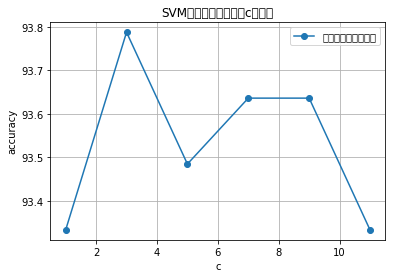

In [43]:
plt.plot(svm1_c_list,svm1_accuracy_list,'o-',label='模板评论分类准确率')
#plt.plot(svm2_c_list,svm2_accuracy_list,'o-',label='水评分类准确率')
plt.xlabel('c')
plt.ylabel('accuracy')
plt.title('SVM分类准确率与参数c的关系')
plt.savefig('figure/SVM分类准确率与参数c的关系', dpi=300)
plt.grid()
plt.legend()
plt.show()

/home/harry/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


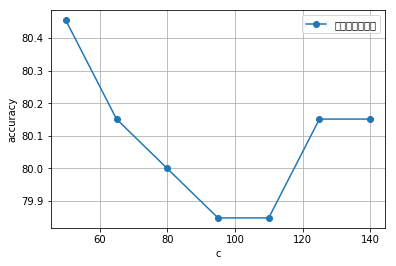

In [44]:
plt.plot(svm2_c_list,svm2_accuracy_list,'o-',label='水评分类准确率')
plt.xlabel('c')
plt.ylabel('accuracy')
plt.grid()
plt.legend()
plt.show()

# 3.使用朴素贝叶斯分类

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb1=GaussianNB()
gnb2=GaussianNB()
gnb1.fit(X_train,Y1_train)
gnb2.fit(X_train,Y2_train)
bayes_Y1 = gnb1.predict(X_test)
bayes_Y2 = gnb2.predict(X_test)
print('两种分类器的分类错误量',(bayes_Y1 != Y1_test).sum(),(bayes_Y2 != Y2_test).sum())
print('两种分类器的分类错误率',(bayes_Y1 != Y1_test).sum()/len(Y1_test),(bayes_Y2 != Y2_test).sum()/len(Y2_test))

两种分类器的分类错误量 12 37
两种分类器的分类错误率 0.075 0.23125


# 4.使用Logistic分类器

In [46]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, Y1_train)
clf.score(X_test, Y1_test)

0.925

In [47]:
log1=LogisticRegression()

In [48]:
solver_options=['newton-cg', 'lbfgs', 'liblinear', 'sag','saga']
log1_param_templet = [{'solver': solver_options , 'penalty' : ['l2'],"max_iter":[int(1e5),int(1e4) ]},
                                           {'penalty' : ['l1'] ,  "max_iter":[int(1e5),int(1e4) ]}]
log1_grid=GridSearchCV(log1,log1_param_templet,cv=6,scoring='accuracy',n_jobs=-1)
log1_grid.fit(X_all,Y1_all)

GridSearchCV(cv=6, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l2'], 'max_iter': [100000, 10000]}, {'penalty': ['l1'], 'max_iter': [100000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [49]:
log2=LogisticRegression()
log2_parameters_invalid =[{'solver': solver_options , 'penalty' : ['l2'],"max_iter":[int(1e5),int(1e4) ]},
                                           {'penalty' : ['l1'] ,  "max_iter":[int(1e5),int(1e4) ]}]
log2_grid=GridSearchCV(log2,log2_parameters_invalid ,cv=6,scoring='accuracy',n_jobs=-1)
log2_grid.fit(X_all,Y2_all)

GridSearchCV(cv=6, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l2'], 'max_iter': [100000, 10000]}, {'penalty': ['l1'], 'max_iter': [100000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [50]:
log1_grid.grid_scores_

[mean: 0.93485, std: 0.00625, params: {'max_iter': 100000, 'penalty': 'l2', 'solver': 'newton-cg'},
 mean: 0.93485, std: 0.00625, params: {'max_iter': 100000, 'penalty': 'l2', 'solver': 'lbfgs'},
 mean: 0.93636, std: 0.00742, params: {'max_iter': 100000, 'penalty': 'l2', 'solver': 'liblinear'},
 mean: 0.91061, std: 0.02313, params: {'max_iter': 100000, 'penalty': 'l2', 'solver': 'sag'},
 mean: 0.90606, std: 0.02761, params: {'max_iter': 100000, 'penalty': 'l2', 'solver': 'saga'},
 mean: 0.93485, std: 0.00625, params: {'max_iter': 10000, 'penalty': 'l2', 'solver': 'newton-cg'},
 mean: 0.93485, std: 0.00625, params: {'max_iter': 10000, 'penalty': 'l2', 'solver': 'lbfgs'},
 mean: 0.93636, std: 0.00742, params: {'max_iter': 10000, 'penalty': 'l2', 'solver': 'liblinear'},
 mean: 0.91061, std: 0.02313, params: {'max_iter': 10000, 'penalty': 'l2', 'solver': 'sag'},
 mean: 0.90606, std: 0.02761, params: {'max_iter': 10000, 'penalty': 'l2', 'solver': 'saga'},
 mean: 0.93485, std: 0.01330, param

In [51]:
log1_grid.best_params_

{'max_iter': 100000, 'penalty': 'l2', 'solver': 'liblinear'}

In [52]:
log2_grid.best_params_

{'max_iter': 100000, 'penalty': 'l2', 'solver': 'sag'}

In [53]:
logclf=LogisticRegression()
scores=cross_val_score(logclf,X_all,Y1_all,cv=6,scoring='accuracy')
print(scores.mean())

0.9363636363636365


# 5.使用决策树分类

In [54]:
from sklearn.tree import DecisionTreeClassifier
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
DT1_scores=cross_val_score(clf1,X_all,Y1_all,cv=5,scoring='accuracy')
DT2_scores=cross_val_score(clf2,X_all,Y2_all,cv=5,scoring='accuracy')
print(DT1_scores.mean())#一般准确率
print(DT2_scores.mean())

0.8954841997429381
0.7544822326461539


In [55]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
#训练
from sklearn.tree import DecisionTreeClassifier
Dtree1=DecisionTreeClassifier()
Dtree2=DecisionTreeClassifier()
#Dtree1.fit(SVM_dataSet_transformed, SVM_Y1label)
#Dtree2=DecisionTreeClassifier()
#Dtree2.fit(SVM_dataSet_transformed, SVM_Y2label)
##参数设定
Dtree1_param_templet = [{'max_features' :[i for i in range(10,30)]}]                                         
Dtree1_grid=GridSearchCV(Dtree1,Dtree1_param_templet,cv=5,scoring='accuracy',n_jobs=-1)
Dtree1_grid.fit(X_all,Y1_all)
Dtree2_param_templet = [{'max_features' :[i for i in range(10,30)]}]                                         
Dtree2_grid=GridSearchCV(Dtree2,Dtree2_param_templet,cv=5,scoring='accuracy',n_jobs=-1)
Dtree2_grid.fit(X_all,Y2_all)


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'max_features': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

/home/harry/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


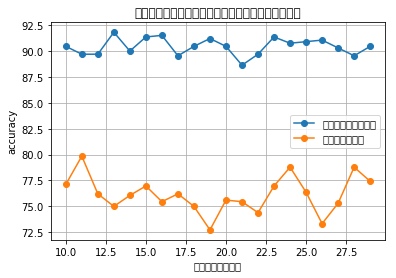

In [56]:
Dtree1_defult_mf_accuracy_list=[]
Dtree2_defult_mf_accuracy_list=[]
for i in range(int(len(Dtree1_grid.grid_scores_))):
    Dtree1_defult_mf_accuracy_list.append(Dtree1_grid.grid_scores_[i][1]*100)
for i in range(int(len(Dtree2_grid.grid_scores_))):
    Dtree2_defult_mf_accuracy_list.append(Dtree2_grid.grid_scores_[i][1]*100)
plt.plot([i for i in range(10,30)],Dtree1_defult_mf_accuracy_list,'o-',label='模板评论分类准确率')
plt.plot([i for i in range(10,30)],Dtree2_defult_mf_accuracy_list,'o-',label='水评分类准确率')
plt.xlabel('最大选取特征数量')
plt.ylabel('accuracy')
plt.title('默认最大树深度下最大选取特征数量与准确率的关系')
plt.savefig('figure/决策树：默认最大树深度下最大选取特征数量与准确率的关系' ,dpi=300)
plt.grid()
plt.legend()
plt.show()

In [57]:
Dtree1=DecisionTreeClassifier()
Dtree2=DecisionTreeClassifier()
##参数设定，最大树深度从1-20
Dtree1_param_templet = [{'max_depth': [i for i in range(1,20)]} ]
Dtree1_grid=GridSearchCV(Dtree1,Dtree1_param_templet,cv=5,scoring='accuracy',n_jobs=-1)
Dtree1_grid.fit(X_all,Y1_all)
Dtree2_param_templet =[{'max_depth': [i for i in range(1,20)]} ]                                     
Dtree2_grid=GridSearchCV(Dtree2,Dtree2_param_templet,cv=5,scoring='accuracy',n_jobs=-1)
Dtree2_grid.fit(X_all,Y2_all)


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [86]:
Dtree1_grid.best_params_

{'max_depth': 2}

In [87]:
Dtree2_grid.best_params_

{'max_depth': 3}

In [58]:
Dtree1_grid.grid_scores_

[mean: 0.91515, std: 0.00929, params: {'max_depth': 1},
 mean: 0.92273, std: 0.01318, params: {'max_depth': 2},
 mean: 0.91818, std: 0.01733, params: {'max_depth': 3},
 mean: 0.91061, std: 0.01782, params: {'max_depth': 4},
 mean: 0.90455, std: 0.01749, params: {'max_depth': 5},
 mean: 0.90000, std: 0.01626, params: {'max_depth': 6},
 mean: 0.89697, std: 0.01582, params: {'max_depth': 7},
 mean: 0.89394, std: 0.01016, params: {'max_depth': 8},
 mean: 0.89848, std: 0.00911, params: {'max_depth': 9},
 mean: 0.89697, std: 0.01421, params: {'max_depth': 10},
 mean: 0.88939, std: 0.00743, params: {'max_depth': 11},
 mean: 0.88636, std: 0.01383, params: {'max_depth': 12},
 mean: 0.89848, std: 0.01734, params: {'max_depth': 13},
 mean: 0.90000, std: 0.02089, params: {'max_depth': 14},
 mean: 0.90303, std: 0.01641, params: {'max_depth': 15},
 mean: 0.89242, std: 0.01049, params: {'max_depth': 16},
 mean: 0.89697, std: 0.00763, params: {'max_depth': 17},
 mean: 0.89545, std: 0.01475, params: {'

/home/harry/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


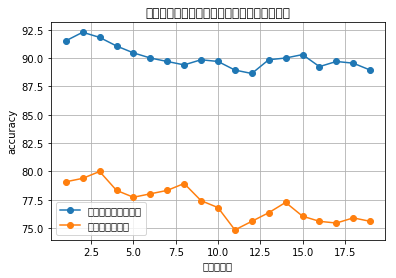

In [59]:
Dtree1_md_accuracy_list=[]
Dtree2_md_accuracy_list=[]
for i in range(int(len(Dtree1_grid.grid_scores_))):
    Dtree1_md_accuracy_list.append(Dtree1_grid.grid_scores_[i][1]*100)
for i in range(int(len(Dtree2_grid.grid_scores_))):
    Dtree2_md_accuracy_list.append(Dtree2_grid.grid_scores_[i][1]*100)
plt.plot([i for i in range(1,20)],Dtree1_md_accuracy_list,'o-',label='模板评论分类准确率')
plt.plot([i for i in range(1,20)],Dtree2_md_accuracy_list,'o-',label='水评分类准确率')
plt.xlabel('最大树深度')
plt.ylabel('accuracy')
plt.title('默认最大特征量下最大树深度与准确率的关系')
plt.savefig('figure/决策树：默认最大特征量下最大树深度与准确率的关系',dpi=300)
plt.grid()
plt.legend()
plt.show()

### 看来最大树深度在2，最大选取特征数量为18会比较好，下面都用这个参数来做提升

# 6.尝试组合模型

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

/home/harry/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## AdaBoosting

In [95]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
ada1_accuracy=[]
ada2_accuracy=[]
n_list=[i for i in range(1,100,2)]
for times in n_list:
    ada1=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,max_features=10),
                             algorithm="SAMME",
                             n_estimators=times)
    ada1_scores=cross_val_score(ada1,X_all,Y1_all,cv=5,scoring='accuracy')
    ada1_accuracy.append(ada1_scores.mean())
    print("the accuracy of Adaboost is {0}%, while n={1}".format(ada1_scores.mean(),times))
for times in n_list:
    ada2=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2,max_features=10),
                             algorithm="SAMME",
                             n_estimators=times)
    ada2_scores=cross_val_score(ada2,X_all,Y2_all,cv=5,scoring='accuracy')
    ada2_accuracy.append(ada2_scores.mean())
    print("the accuracy of Adaboost is {0}%, while n={1}".format(ada2_scores.mean(),times))

the accuracy of Adaboost is 0.9151361227496221%, while n=1
the accuracy of Adaboost is 0.9121406917710655%, while n=3
the accuracy of Adaboost is 0.9227236202929252%, while n=5
the accuracy of Adaboost is 0.9272811626568155%, while n=7
the accuracy of Adaboost is 0.9211972505865635%, while n=9
the accuracy of Adaboost is 0.9271781118305826%, while n=11
the accuracy of Adaboost is 0.9181552075887149%, while n=13
the accuracy of Adaboost is 0.9226093512754823%, while n=15
the accuracy of Adaboost is 0.9211282021848515%, while n=17
the accuracy of Adaboost is 0.9363263293556583%, while n=19
the accuracy of Adaboost is 0.9256971366653971%, while n=21
the accuracy of Adaboost is 0.9347997857238516%, while n=23
the accuracy of Adaboost is 0.9272347245629688%, while n=25
the accuracy of Adaboost is 0.9302078930845503%, while n=27
the accuracy of Adaboost is 0.9211511603436071%, while n=29
the accuracy of Adaboost is 0.9257313130153628%, while n=31
the accuracy of Adaboost is 0.936291979080247

/home/harry/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


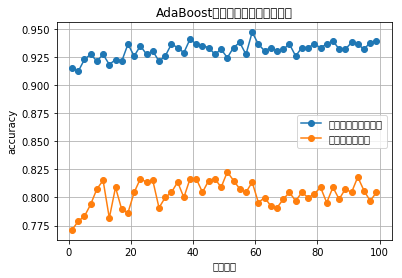

In [96]:
plt.plot(n_list,ada1_accuracy,'o-',label='模板评论识别准确率')
plt.plot(n_list,ada2_accuracy,'o-',label='水评识别准确率')
plt.xlabel('迭代次数')
plt.ylabel('accuracy')
plt.title('AdaBoost迭代次数与准确率的关系')
plt.savefig('figure/AdaBoost迭代次数与准确率的关系',dpi=300)
plt.grid()
plt.legend()
plt.show()

/home/harry/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


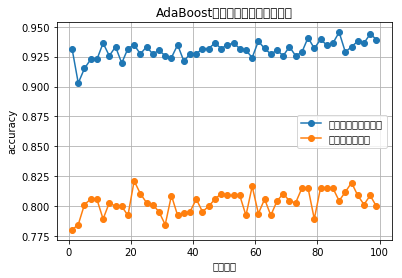

In [63]:
##备用
plt.plot(n_list,ada1_accuracy,'o-',label='模板评论识别准确率')
plt.plot(n_list,ada2_accuracy,'o-',label='水评识别准确率')
plt.xlabel('迭代次数')
plt.ylabel('accuracy')
plt.title('AdaBoost迭代次数与准确率的关系')
plt.savefig('figure/AdaBoost迭代次数与准确率的关系',dpi=300)
plt.grid()
plt.legend()
plt.show()

## Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
gdbt1=GradientBoostingClassifier()
gdbt1_scores=cross_val_score(gdbt1,X_all,Y1_all,cv=5,scoring='accuracy')
print("The accuracy of GBDT1 model is {0}%".format(gdbt1_scores.mean()*100))
gdbt2=GradientBoostingClassifier()
gdbt2_scores=cross_val_score(gdbt2,X_all,Y2_all,cv=5,scoring='accuracy')
print("The accuracy of GBDT2 model is {0}%".format(gdbt2_scores.mean()*100))

The accuracy of GBDT1 model is 93.17461766839025%
The accuracy of GBDT2 model is 81.51133385163115%


## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier(n_estimators=10,n_jobs=-1)
rf1_scores=cross_val_score(rf1,X_all,Y1_all,cv=5,scoring='accuracy')
print("The accuracy of Random forest1 model is {0}%".format(rf1_scores.mean()*100))
rf2=RandomForestClassifier()
rf2_scores=cross_val_score(rf2,X_all,Y2_all,cv=5,scoring='accuracy')
print("The accuracy of Random forest2 model is {0}%".format(rf2_scores.mean()*100))

The accuracy of Random forest1 model is 91.35980130757149%
The accuracy of Random forest2 model is 78.93664591736106%


In [111]:
rf1_param_templet = [{'max_features' :[i for i in range(1,32,4)], 'max_depth':[i for i in range(1,20,5)],'n_estimators':[10,155]}]                                         
rf1_grid=GridSearchCV(rf1,rf1_param_templet,cv=5,scoring='accuracy',n_jobs=-1)
rf1_grid.fit(X_all,Y1_all)
rf2_param_templet = [{'max_features' :[i for i in range(1,32,4)], 'max_depth':[i for i in range(1,20,5)],'n_estimators':[10,155]}]                                         
rf2_grid=GridSearchCV(rf2,rf2_param_templet,cv=5,scoring='accuracy',n_jobs=-1)
rf2_grid.fit(X_all,Y2_all)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'max_features': [1, 5, 9, 13, 17, 21, 25, 29], 'max_depth': [1, 6, 11, 16], 'n_estimators': [10, 155]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [112]:
print(rf1_grid.best_score_,'with',rf1_grid.best_params_)

0.9424242424242424 with {'max_depth': 11, 'max_features': 1, 'n_estimators': 10}


In [113]:
rf1_grid.grid_scores_

[mean: 0.88333, std: 0.01165, params: {'max_depth': 1, 'max_features': 1, 'n_estimators': 10},
 mean: 0.90000, std: 0.01948, params: {'max_depth': 1, 'max_features': 1, 'n_estimators': 155},
 mean: 0.92576, std: 0.01603, params: {'max_depth': 1, 'max_features': 5, 'n_estimators': 10},
 mean: 0.92727, std: 0.01957, params: {'max_depth': 1, 'max_features': 5, 'n_estimators': 155},
 mean: 0.92879, std: 0.01304, params: {'max_depth': 1, 'max_features': 9, 'n_estimators': 10},
 mean: 0.92576, std: 0.01305, params: {'max_depth': 1, 'max_features': 9, 'n_estimators': 155},
 mean: 0.92727, std: 0.01395, params: {'max_depth': 1, 'max_features': 13, 'n_estimators': 10},
 mean: 0.92576, std: 0.01012, params: {'max_depth': 1, 'max_features': 13, 'n_estimators': 155},
 mean: 0.92727, std: 0.01730, params: {'max_depth': 1, 'max_features': 17, 'n_estimators': 10},
 mean: 0.92727, std: 0.01223, params: {'max_depth': 1, 'max_features': 17, 'n_estimators': 155},
 mean: 0.92121, std: 0.01042, params: {'m

In [114]:
print(rf2_grid.best_score_,'with',rf2_grid.best_params_)

0.8257575757575758 with {'max_depth': 6, 'max_features': 25, 'n_estimators': 155}


In [115]:
rf2_grid.grid_scores_

[mean: 0.78030, std: 0.00890, params: {'max_depth': 1, 'max_features': 1, 'n_estimators': 10},
 mean: 0.77424, std: 0.00229, params: {'max_depth': 1, 'max_features': 1, 'n_estimators': 155},
 mean: 0.79242, std: 0.01653, params: {'max_depth': 1, 'max_features': 5, 'n_estimators': 10},
 mean: 0.78182, std: 0.01587, params: {'max_depth': 1, 'max_features': 5, 'n_estimators': 155},
 mean: 0.79848, std: 0.00687, params: {'max_depth': 1, 'max_features': 9, 'n_estimators': 10},
 mean: 0.79848, std: 0.01556, params: {'max_depth': 1, 'max_features': 9, 'n_estimators': 155},
 mean: 0.79848, std: 0.01641, params: {'max_depth': 1, 'max_features': 13, 'n_estimators': 10},
 mean: 0.80000, std: 0.02067, params: {'max_depth': 1, 'max_features': 13, 'n_estimators': 155},
 mean: 0.79848, std: 0.01480, params: {'max_depth': 1, 'max_features': 17, 'n_estimators': 10},
 mean: 0.80000, std: 0.02022, params: {'max_depth': 1, 'max_features': 17, 'n_estimators': 155},
 mean: 0.79848, std: 0.01641, params: {'m

## 最后对于水评分类随机森林还是蛮好的